In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


##Realize uma análise exploratória nos dados, identificando e explorando: 
###(i) correlações entre as variáveis
###(ii) distribuição das variáveis e
###(iii) valores ausentes (10 pts.)



In [ ]:
dataUrl = 'https://gist.githubusercontent.com/AramisAraujo/bc57fae5f1636dfe6db53c35cd0401d1/raw/6a22e7f7fa67aba536f504353c60d7b516e26876/CDP%2520cartola.csv'

df = pd.read_csv(dataUrl)

df.head(15)

,atleta_id,rodada,clube_id,participou,posicao_id,jogos_num,pontos_num,media_num,preco_num,variacao_num,partida_id,mando,titular,substituido,tempo_jogado,nota,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
0,36443,0,NaN,0,NaN,0,0.0,0.0,9.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36522,0,NaN,0,NaN,0,0.0,0.0,19.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36540,0,NaN,0,NaN,0,0.0,0.0,15.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36612,0,NaN,0,NaN,0,0.0,0.0,22.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,36728,0,NaN,0,NaN,0,0.0,0.0,5.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,36775,0,NaN,0,NaN,0,0.0,0.0,5.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,36790,0,NaN,0,NaN,0,0.0,0.0,12.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,36792,0,NaN,0,NaN,0,0.0,0.0,16.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,36802,0,NaN,0,NaN,0,0.0,0.0,25.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,36856,0,NaN,0,NaN,0,0.0,0.0,3.0,0.0,NaN,0,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
nullsByColumn = df.isnull().sum().sort_values(ascending=False)
percentNulls = df.isnull().sum()/df.isnull().count()*100
percentNullsRound = (round(percentNulls, 1)).sort_values(ascending=False)
missingData = pd.concat([nullsByColumn, percentNullsRound], axis=1, keys=['Total N/A rows', '%'])
missingData

,Total N/A rows,%
nota,20329,67.9
tempo_jogado,14458,48.3
clube_id,14458,48.3
posicao_id,14458,48.3
titular,14458,48.3
partida_id,13719,45.8
variacao_num,0,0.0
substituido,0,0.0
mando,0,0.0
GS,0,0.0


In [ ]:
df = df[df['clube_id'].notnull()]
df['nota'] = df['nota'].fillna(value=0)


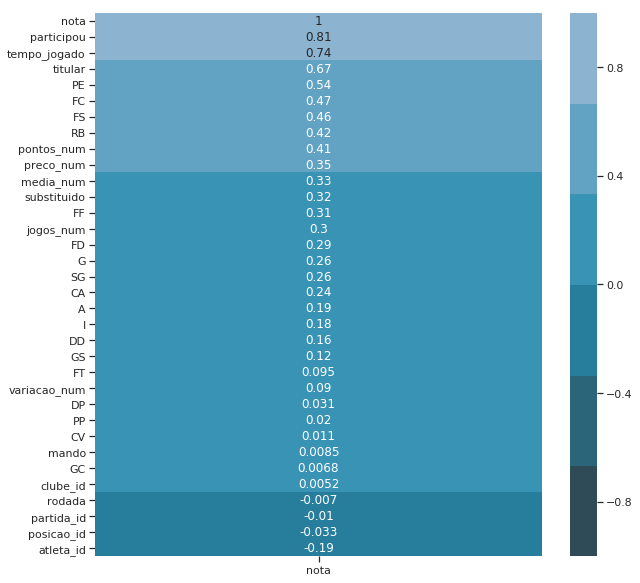

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['nota']].sort_values(by=['nota'],ascending=False),
            vmin=-1,
            cmap= sns.color_palette("PuBuGn_d"),
            annot=True);

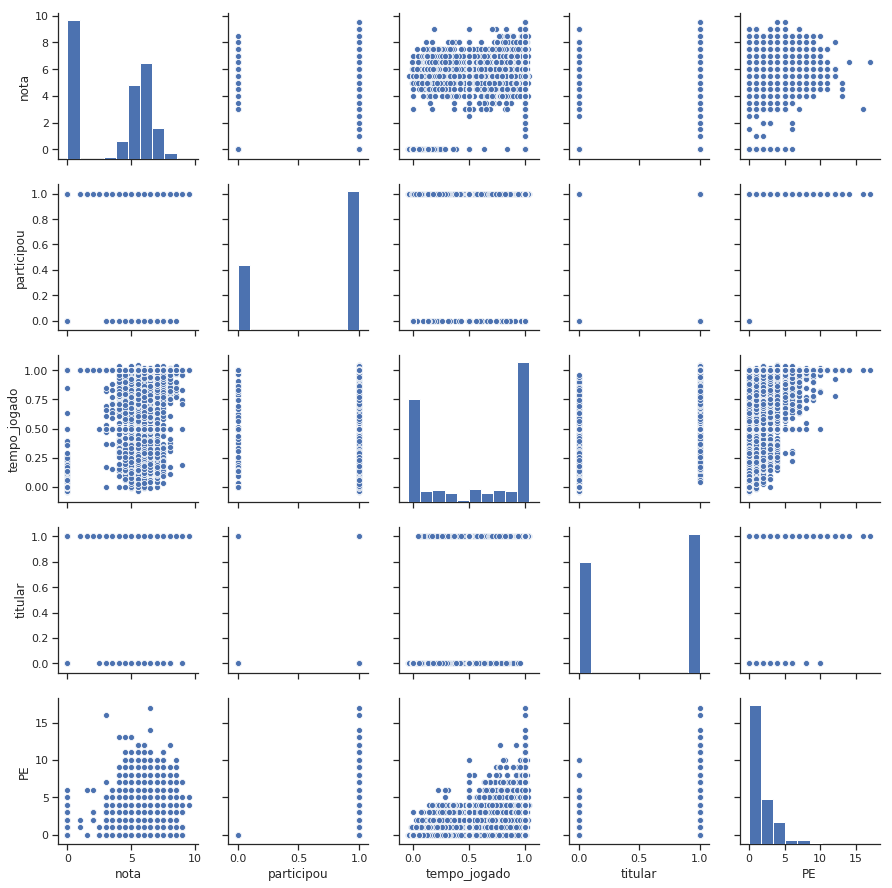

In [ ]:
sns.set(style="ticks")
sns.pairplot(df[['nota','participou','tempo_jogado','titular','PE']])

##Usando todas as variáveis disponíveis, tune (usando validação cruzada):
###(i) um modelo de regressão Ridge
###(ii) um modelo de regressão Lasso e 
###(iii) um modelo KNN. Para os modelos de regressão linear, o parâmetro a ser tunado é o lambda (penalização dos coeficientes) e no KNN o número (K) de vizinhos. Compare os três modelos em termos do erro RMSE de validação cruzada. (30 pts.)


### Particionamento treino e teste

In [ ]:
x = df.loc[:, df.columns != 'nota']
y = df[['nota']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Ridge

In [ ]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

ridgeScore = cross_val_score(model_ridge, x, y, cv=5)
ridgeScoreMean = np.mean(ridgeScore)

print(model_ridge.coef_, "\n")

print("CV Ridge Scores: ", ridgeScore)
print("CV Ridge Mean Score: ", ridgeScoreMean, "\n")

sortedRidgeCoefficients = sorted(model_ridge.coef_[0])

print("M.S. Coefficients: ", sortedRidgeCoefficients[-1], sortedRidgeCoefficients[-2], sortedRidgeCoefficients[-3])

[[ 4.96850385e-07  2.09042197e-03 -2.60289048e-04  1.61723639e+00
  -1.68805187e-01  5.11533294e-03 -9.00135390e-01 -2.43761048e-02
   1.46766208e-02  2.55959978e-04 -3.11605825e-04  8.66150557e-02
  -1.45677838e+00  1.53684422e+00  4.69801132e+00  5.26595028e-01
  -2.38918774e-01  5.24556196e+00  3.68674803e+00  1.13411635e+00
   7.69589732e-01  8.53612350e+00 -4.52513917e-01 -3.91830758e+00
   1.65249854e+00 -3.70668218e-01 -6.37133203e+00 -1.79984766e+00
  -5.99921598e+00  4.99968961e+00  3.13674706e+00  6.82964236e+00
  -1.86867290e+00]] 

CV Ridge Scores:  [0.83731356 0.84815023 0.85745751 0.84817007 0.8513404 ]
CV Ridge Mean Score:  0.8484863548180316 

M.S. Coefficients:  8.536123499474572 6.829642358865471 5.245561957400044


### Lasso

In [ ]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(x_train, y_train)

lassoScore = cross_val_score(model_lasso, x, y, cv=5)
lassoMeanScore = np.mean(lassoScore)

print(model_lasso.coef_, "\n")

print("CV Lasso Scores", lassoScore)
print("CV Lasso Mean Score", lassoMeanScore)

sortedLassoCoefficients = sorted(model_lasso.coef_)

print("M.S. Coefficient: ", sortedLassoCoefficients[-1],  sortedLassoCoefficients[-2],  sortedLassoCoefficients[-3])

[-8.78979546e-06 -1.50944560e-02  1.81253489e-03  5.22160220e-01
 -0.00000000e+00  6.53229592e-02  1.92692201e-01  0.00000000e+00
  1.64795240e-02 -0.00000000e+00 -1.10252979e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.28120733e-02
  4.05342800e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.32216287e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00] 

CV Lasso Scores [0.51541873 0.54719516 0.54825356 0.54468402 0.53450665]
CV Lasso Mean Score 0.5380116223691271
M.S. Coefficient:  0.5221602200198551 0.40534279958910063 0.33221628679385656


### KNN

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(x_train, y_train)

knnScore = cross_val_score(model_knn, x, y, cv=5)
knnMeanScore = np.mean(knnScore)

print("CV KNN Scores: ", knnScore)
print("CV KNN Mean Score: ", knnMeanScore)

CV KNN Scores:  [-0.1492636  -0.03114442  0.02555681 -0.01901228  0.01640608]
CV KNN Mean Score:  -0.03149148120401215


##Quais as variáveis mais importantes segundo o modelo de regressão Ridge e Lasso?  Variáveis foram descartadas pelo Lasso? Quais? (10 pts.)


As variaveis mais importantes para o modelo Ridge foram: 

Enquanto para o modelo Lasso:

No modelo Lasso, foram desconsideradas as variaveis: 

##Re-treine o melhor modelo (usando os melhores valores de parâmetros encontrados em todos os dados, sem usar validação cruzada). Use esse último modelo treinado para prever os dados de teste disponíveis no challenge que criamos na plataforma Kaggle (30 pts.)

In [ ]:
test = pd.read_csv('https://gist.githubusercontent.com/AramisAraujo/c360f6303d7cae7455ccd1c214769081/raw/33529c9aaca0061c9f2f668e4795f35b2716e807/testCartola.csv')
train = pd.read_csv('https://gist.githubusercontent.com/AramisAraujo/241358d4394674e7b7099cacb8e7f664/raw/146d57921aabecf66ac1b3c0d0dac6b21bea6ac6/trainCartola.csv')

train = train[train['clube_id'].notnull()]
train['nota'] = train['nota'].fillna(value=0)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(train.loc[:, train.columns != 'nota'], train[['nota']]);


test['clube_id'] = test['clube_id'].fillna(value=0)
test['posicao_id'] = test['posicao_id'].fillna(value=0)
test['titular'] = test['titular'].fillna(value=0)
test['tempo_jogado'] = test['tempo_jogado'].fillna(value=0)



pred = rf.predict(test)

x_test_copy
test['nota'] = pred
test['ID'] = test['atleta_id'].map(str) +'_' + test['rodada'].map(str)
test[['ID','nota']].to_csv('outputPred.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
